In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### 1. Problem Statement:

### 2. Data Gathering:

In [2]:
df = pd.read_csv(r"C:\Data Science\Datasets\healthcare-dataset-stroke-data.csv")
df

id  gender   age  hypertension  heart_disease ever_married   
0      9046    Male  67.0             0              1          Yes  \
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status   
0           Private          Urban             228.69  36.6  formerly smoked  \
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### 3. Exploratory Data Analysis:

##### shape

In [4]:
df.shape

(5110, 12)

##### Null Values

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### DataType

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##### unique values

In [7]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

##### duplicates

In [8]:
df.duplicated().sum()

0

##### Statistics

In [9]:
df.describe()

id          age  hypertension  heart_disease   
count   5110.000000  5110.000000   5110.000000    5110.000000  \
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

<Axes: title={'center': 'Target Column'}, xlabel='stroke', ylabel='count'>

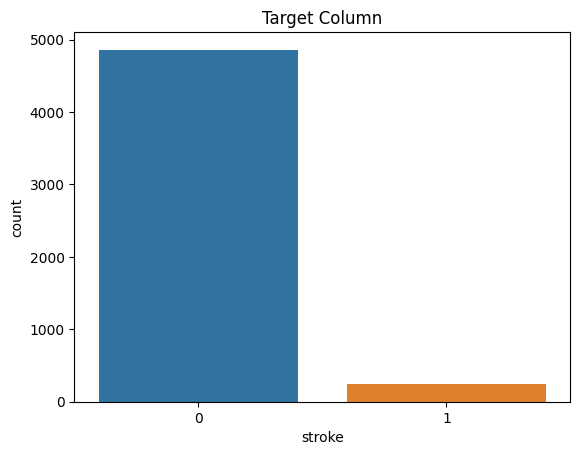

In [10]:
plt.title('Target Column')
sns.countplot(x = df['stroke'])

         The Target Column is highly imbalance with lot of class 0 values

In [11]:
object_columns = df.select_dtypes(include =object).columns
numerical_columns = df.select_dtypes(exclude= object).columns

print(f'we have {len(object_columns)} object features such as {object_columns}')
print("-"*80)
print(f'we have {len(numerical_columns)} numerical features such as {numerical_columns}')

we have 5 object features such as Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
--------------------------------------------------------------------------------
we have 7 numerical features such as Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


In [12]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<Axes: xlabel='gender', ylabel='hypertension'>

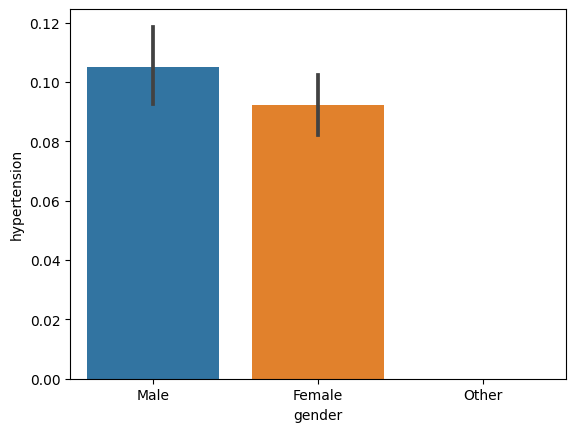

In [13]:
sns.barplot(y = df['hypertension'],x = df['gender'])

                 Male have more hypertension, as compare to Female

<Axes: xlabel='bmi', ylabel='Frequency'>

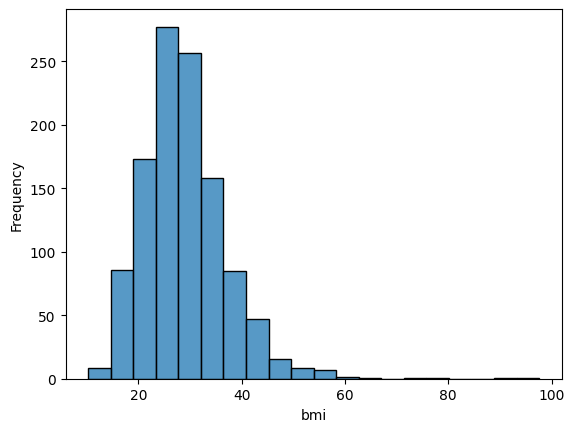

In [14]:
sns.histplot(x = df['bmi'],bins=20,stat='frequency')

In [15]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

Text(0.5, 1.0, 'Smoking Status')

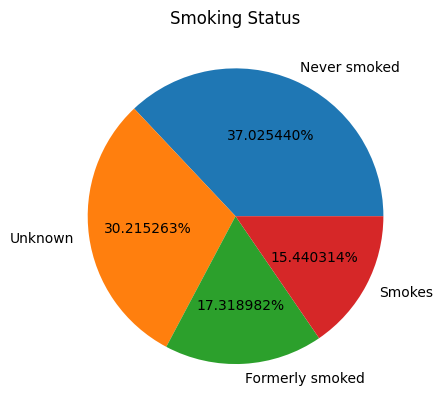

In [16]:
smoking_index = df['smoking_status'].value_counts()
l = 'Never smoked','Unknown','Formerly smoked','Smokes'
plt.pie(smoking_index,labels=l,autopct = '%2f%%')
plt.title('Smoking Status')

In [17]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Text(0.5, 1.0, 'Work Type')

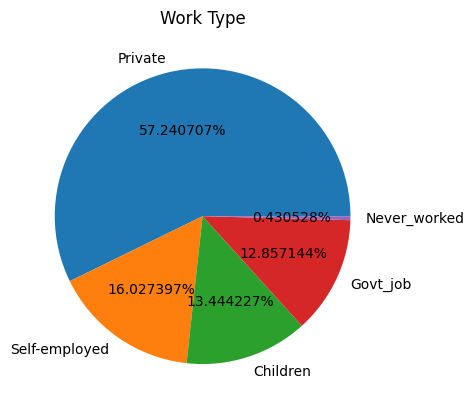

In [18]:
work_index = df['work_type'].value_counts()
l = 'Private','Self-employed','Children','Govt_job','Never_worked'
plt.pie(work_index,labels=l,autopct = '%2f%%')
plt.title('Work Type')

### 4. Feature Engineering 

Updating the values of features

#### Handling Missing Values

In [19]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
np.around(df['bmi'].median())

28.0

In [21]:
df['bmi'].fillna(np.around(df['bmi'].median()),inplace = True)

####  Encoding 

* id

In [22]:
df.drop('id',axis =1,inplace = True)

* gender

In [23]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [24]:
df['gender'].replace({'Male':1, 'Female':0, 'Other':2},inplace =True)

* ever_married

In [25]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [26]:
df['ever_married'].replace({'Yes':1,'No':0},inplace =True)

* Residence_type

In [27]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [28]:
df['Residence_type'].replace({'Urban':1, 'Rural':0},inplace = True)

#### One Hot Encoding

* work_type
* smoking_status

In [29]:
df = pd.get_dummies(df,columns = ['work_type','smoking_status'],dtype=int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   Residence_type                  5110 non-null   int64  
 6   avg_glucose_level               5110 non-null   float64
 7   bmi                             5110 non-null   float64
 8   stroke                          5110 non-null   int64  
 9   work_type_Govt_job              5110 non-null   int32  
 10  work_type_Never_worked          5110 non-null   int32  
 11  work_type_Private               5110 non-null   int32  
 12  work_type_Self-employed         51

In [31]:
df

gender   age  hypertension  heart_disease  ever_married  Residence_type   
0          1  67.0             0              1             1               1  \
1          0  61.0             0              0             1               0   
2          1  80.0             0              1             1               0   
3          0  49.0             0              0             1               1   
4          0  79.0             1              0             1               0   
...      ...   ...           ...            ...           ...             ...   
5105       0  80.0             1              0             1               1   
5106       0  81.0             0              0             1               1   
5107       0  35.0             0              0             1               0   
5108       1  51.0             0              0             1               0   
5109       0  44.0             0              0             1               1   

      avg_glucose_level   bmi  stroke  work_type_Govt_job   
0                228.69  36.6       1                   0  \
1                202.21  28.0       1                   0   
2                105.92  32.5       1                   0   
3                171.23  34.4       1                   0   
4                174.12  24.0       1                   0   
...                 ...   ...     ...                 ...   
5105              83.75  28.0       0                   0   
5106             125.20  40.0       0                   0   
5107              82.99  30.6       0                   0   
5108             166.29  25.6       0                   0   
5109              85.28  26.2       0                   1   

      work_type_Never_worked  work_type_Private  work_type_Self-employed   
0                          0                  1                        0  \
1                          0                  0                        1   
2                          0                  1                        0   
3                          0                  1                        0   
4                          0                  0                        1   
...                      ...                ...                      ...   
5105                       0                  1                        0   
5106                       0                  0                        1   
5107                       0                  0                        1   
5108                       0                  1                        0   
5109                       0                  0                        0   

      work_type_children  smoking_status_Unknown   
0                      0                       0  \
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   
...                  ...                     ...   
5105                   0                       0   
5106                   0                       0   
5107                   0                       0   
5108                   0                       0   
5109                   0                       1   

      smoking_status_formerly smoked  smoking_status_never smoked   
0                                  1                            0  \
1                                  0                            1   
2                                  0                            1   
3                                  0                            0   
4                                  0                            1   
...                              ...                          ...   
5105                               0                            1   
5106                               0                            1   
5107                               0                            1   
5108                               1                            0   
510

#### Outliers

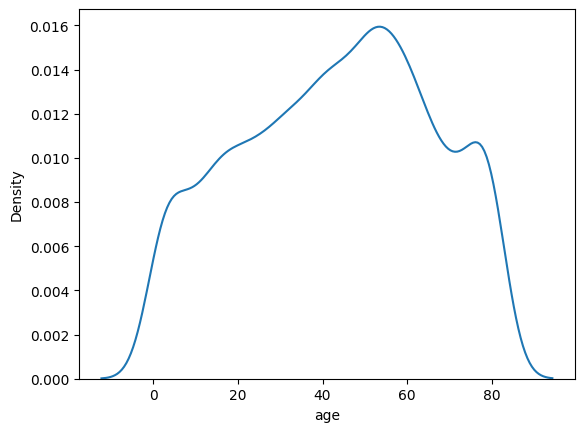

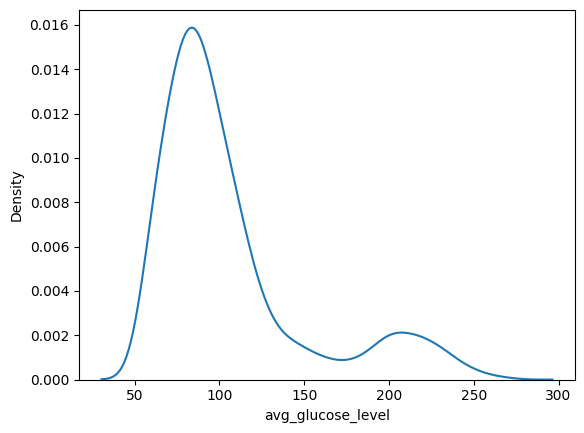

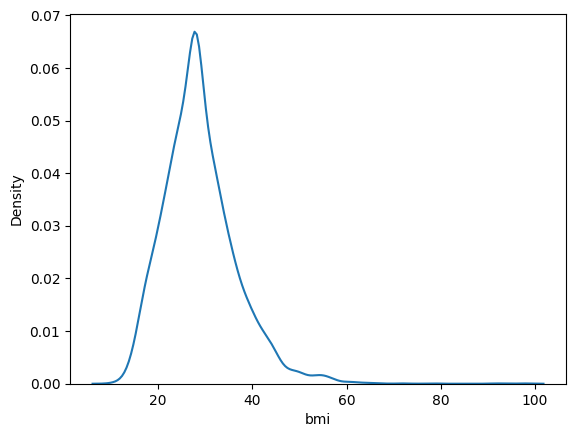

In [32]:
for column in ['age', 'avg_glucose_level', 'bmi']:
    sns.kdeplot(df[column])
    plt.show()

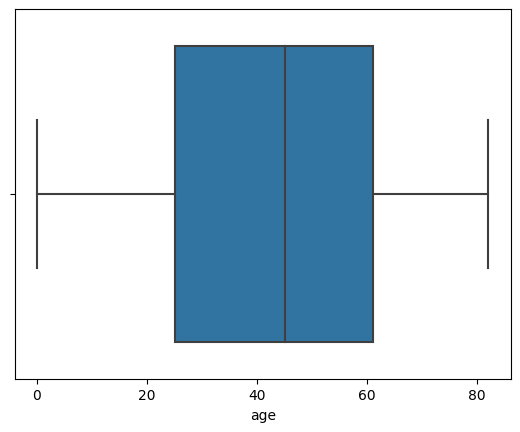

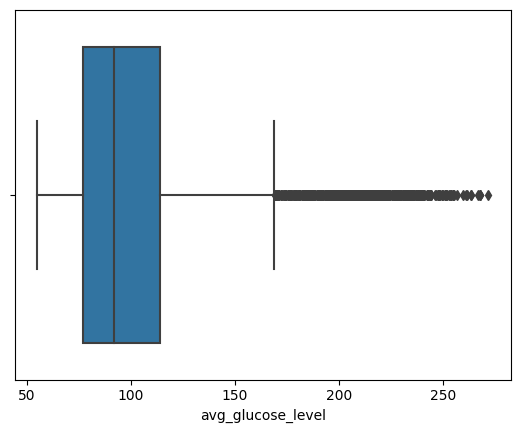

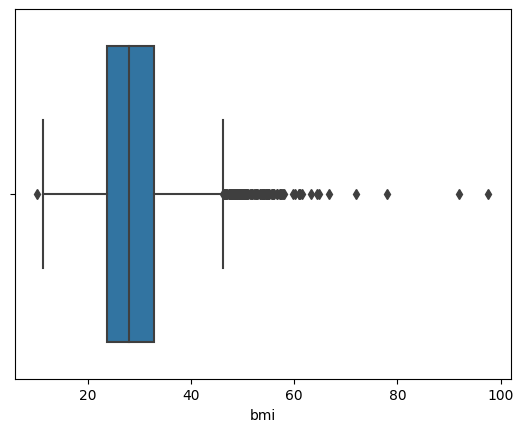

In [33]:
for column in ['age', 'avg_glucose_level', 'bmi']:
    sns.boxplot(x =df[column])
    plt.show()

In [34]:
for column in ['age', 'avg_glucose_level', 'bmi']:
    print(column)
    
    q1 = np.quantile(df[column],0.25)
    q2 = np.quantile(df[column],0.50)
    q3 = np.quantile(df[column],0.75)

    print("Q1 :",q1)
    print("Q2 :",q2)
    print("Q3 :",q3)

    iqr = q3-q1
    print("IQR is :",iqr)

    upper_tail = q3 + 1.5 * iqr
    print("Upper Tail :", upper_tail)

    lower_tail = q1 -1.5*iqr
    print("Lower Tail :", lower_tail)
    
    outliers = []
    for Xi in df[column]:
        if Xi > upper_tail:
            outliers.append(Xi)
    print('Outliers : ',len(outliers))
    
    print('-'*50)

age
Q1 : 25.0
Q2 : 45.0
Q3 : 61.0
IQR is : 36.0
Upper Tail : 115.0
Lower Tail : -29.0
Outliers :  0
--------------------------------------------------
avg_glucose_level
Q1 : 77.245
Q2 : 91.88499999999999
Q3 : 114.09
IQR is : 36.845
Upper Tail : 169.35750000000002
Lower Tail : 21.977500000000006
Outliers :  627
--------------------------------------------------
bmi
Q1 : 23.8
Q2 : 28.0
Q3 : 32.8
IQR is : 8.999999999999996
Upper Tail : 46.29999999999999
Lower Tail : 10.300000000000006
Outliers :  125
--------------------------------------------------


#### Box-Cox Transformation

* avg_glucose_level

In [35]:
from scipy.stats import boxcox

In [36]:
df['avg_glucose_level']=boxcox(df['avg_glucose_level'])[0]

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

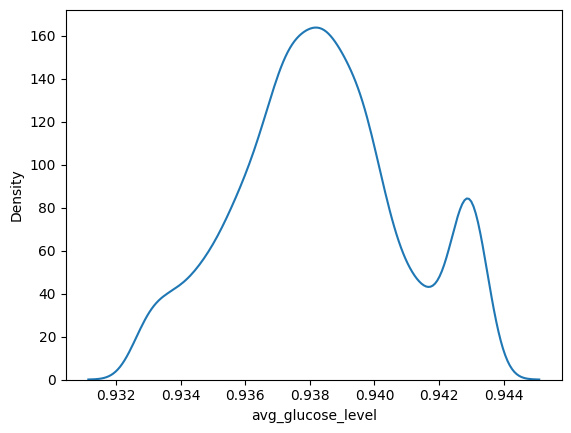

In [37]:
sns.kdeplot(df['avg_glucose_level'])

<Axes: xlabel='avg_glucose_level'>

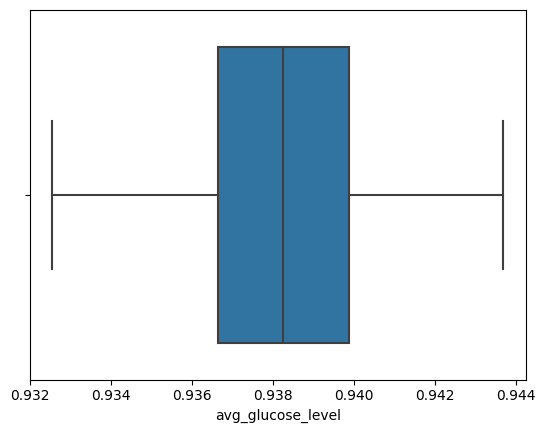

In [38]:
sns.boxplot(x = df['avg_glucose_level'])

* bmi

<Axes: xlabel='bmi', ylabel='Density'>

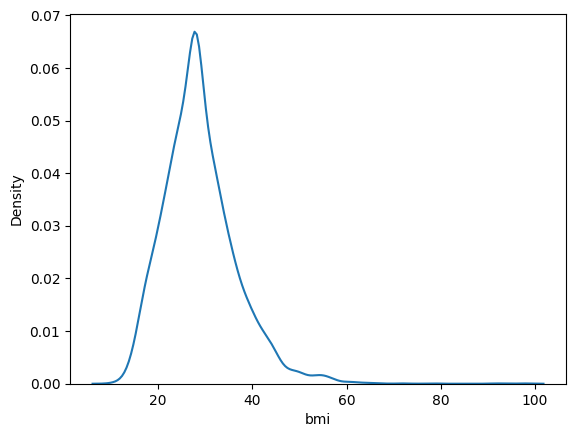

In [39]:
sns.kdeplot(df['bmi'])

<Axes: >

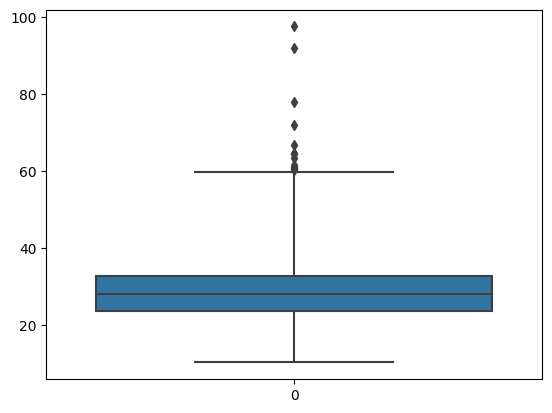

In [40]:
sns.boxplot(df['bmi'], whis = 3)

In [41]:
q1 = np.quantile(df['bmi'],0.25)
q2 = np.quantile(df['bmi'],0.50)
q3 = np.quantile(df['bmi'],0.75)

print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)

iqr = q3-q1
print("IQR is :",iqr)

upper_tail = q3 + 3 *iqr
print("Upper Tail :", upper_tail)

lower_tail = q3 - 3 *iqr
print("Lower Tail :", lower_tail)

Q1 : 23.8
Q2 : 28.0
Q3 : 32.8
IQR is : 8.999999999999996
Upper Tail : 59.79999999999998
Lower Tail : 5.800000000000008


In [42]:
outliers = []
for Xi in df['bmi']:
    if Xi > upper_tail or Xi < lower_tail:
        outliers.append(Xi)
len(outliers)

13

####  Imputation 

In [43]:
df.loc[df['bmi']>upper_tail,'bmi'] = upper_tail

<Axes: >

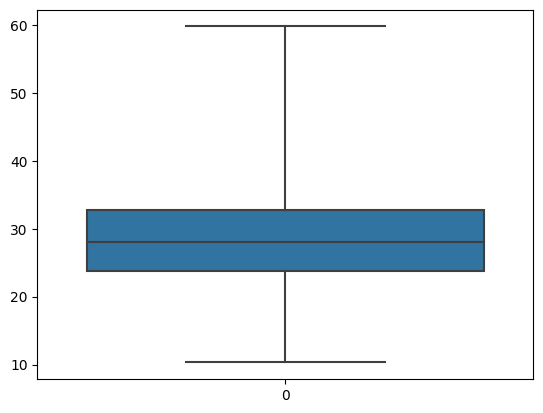

In [44]:
sns.boxplot(df['bmi'],whis = 3)

In [45]:
outliers = []
for Xi in df['bmi']:
    if Xi > upper_tail or Xi < lower_tail:
        outliers.append(Xi)
len(outliers)

0

### Sampling

In [46]:
df

gender   age  hypertension  heart_disease  ever_married  Residence_type   
0          1  67.0             0              1             1               1  \
1          0  61.0             0              0             1               0   
2          1  80.0             0              1             1               0   
3          0  49.0             0              0             1               1   
4          0  79.0             1              0             1               0   
...      ...   ...           ...            ...           ...             ...   
5105       0  80.0             1              0             1               1   
5106       0  81.0             0              0             1               1   
5107       0  35.0             0              0             1               0   
5108       1  51.0             0              0             1               0   
5109       0  44.0             0              0             1               1   

      avg_glucose_level   bmi  stroke  work_type_Govt_job   
0              0.943185  36.6       1                   0  \
1              0.942763  28.0       1                   0   
2              0.939370  32.5       1                   0   
3              0.942098  34.4       1                   0   
4              0.942171  24.0       1                   0   
...                 ...   ...     ...                 ...   
5105           0.937439  28.0       0                   0   
5106           0.940480  40.0       0                   0   
5107           0.937354  30.6       0                   0   
5108           0.941969  25.6       0                   0   
5109           0.937606  26.2       0                   1   

      work_type_Never_worked  work_type_Private  work_type_Self-employed   
0                          0                  1                        0  \
1                          0                  0                        1   
2                          0                  1                        0   
3                          0                  1                        0   
4                          0                  0                        1   
...                      ...                ...                      ...   
5105                       0                  1                        0   
5106                       0                  0                        1   
5107                       0                  0                        1   
5108                       0                  1                        0   
5109                       0                  0                        0   

      work_type_children  smoking_status_Unknown   
0                      0                       0  \
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   
...                  ...                     ...   
5105                   0                       0   
5106                   0                       0   
5107                   0                       0   
5108                   0                       0   
5109                   0                       1   

      smoking_status_formerly smoked  smoking_status_never smoked   
0                                  1                            0  \
1                                  0                            1   
2                                  0                            1   
3                                  0                            0   
4                                  0                            1   
...                              ...                          ...   
5105                               0                            1   
5106                               0                            1   
5107                               0                            1   
5108                               1                            0   
510

#### SMOTE

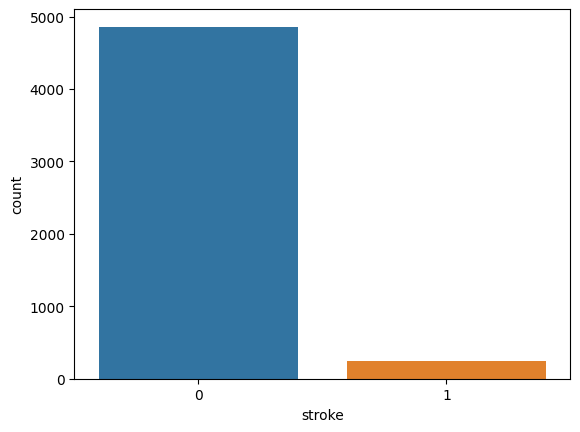

In [47]:
sns.countplot(x = df['stroke'])
plt.show()

In [48]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [51]:
x = df.drop('stroke',axis = 1)
y = df['stroke']

smote = SMOTE(sampling_strategy = 0.9)
x_sampled, y_sampled = smote.fit_resample(x,y)

In [52]:
y_sampled.value_counts()

stroke
0    4861
1    4374
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

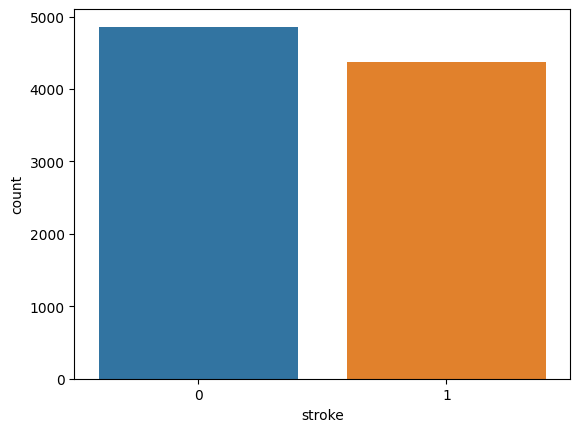

In [53]:
sns.countplot(x = y_sampled)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   Residence_type                  5110 non-null   int64  
 6   avg_glucose_level               5110 non-null   float64
 7   bmi                             5110 non-null   float64
 8   stroke                          5110 non-null   int64  
 9   work_type_Govt_job              5110 non-null   int32  
 10  work_type_Never_worked          5110 non-null   int32  
 11  work_type_Private               5110 non-null   int32  
 12  work_type_Self-employed         51

### Correlation Heatmap

<Axes: >

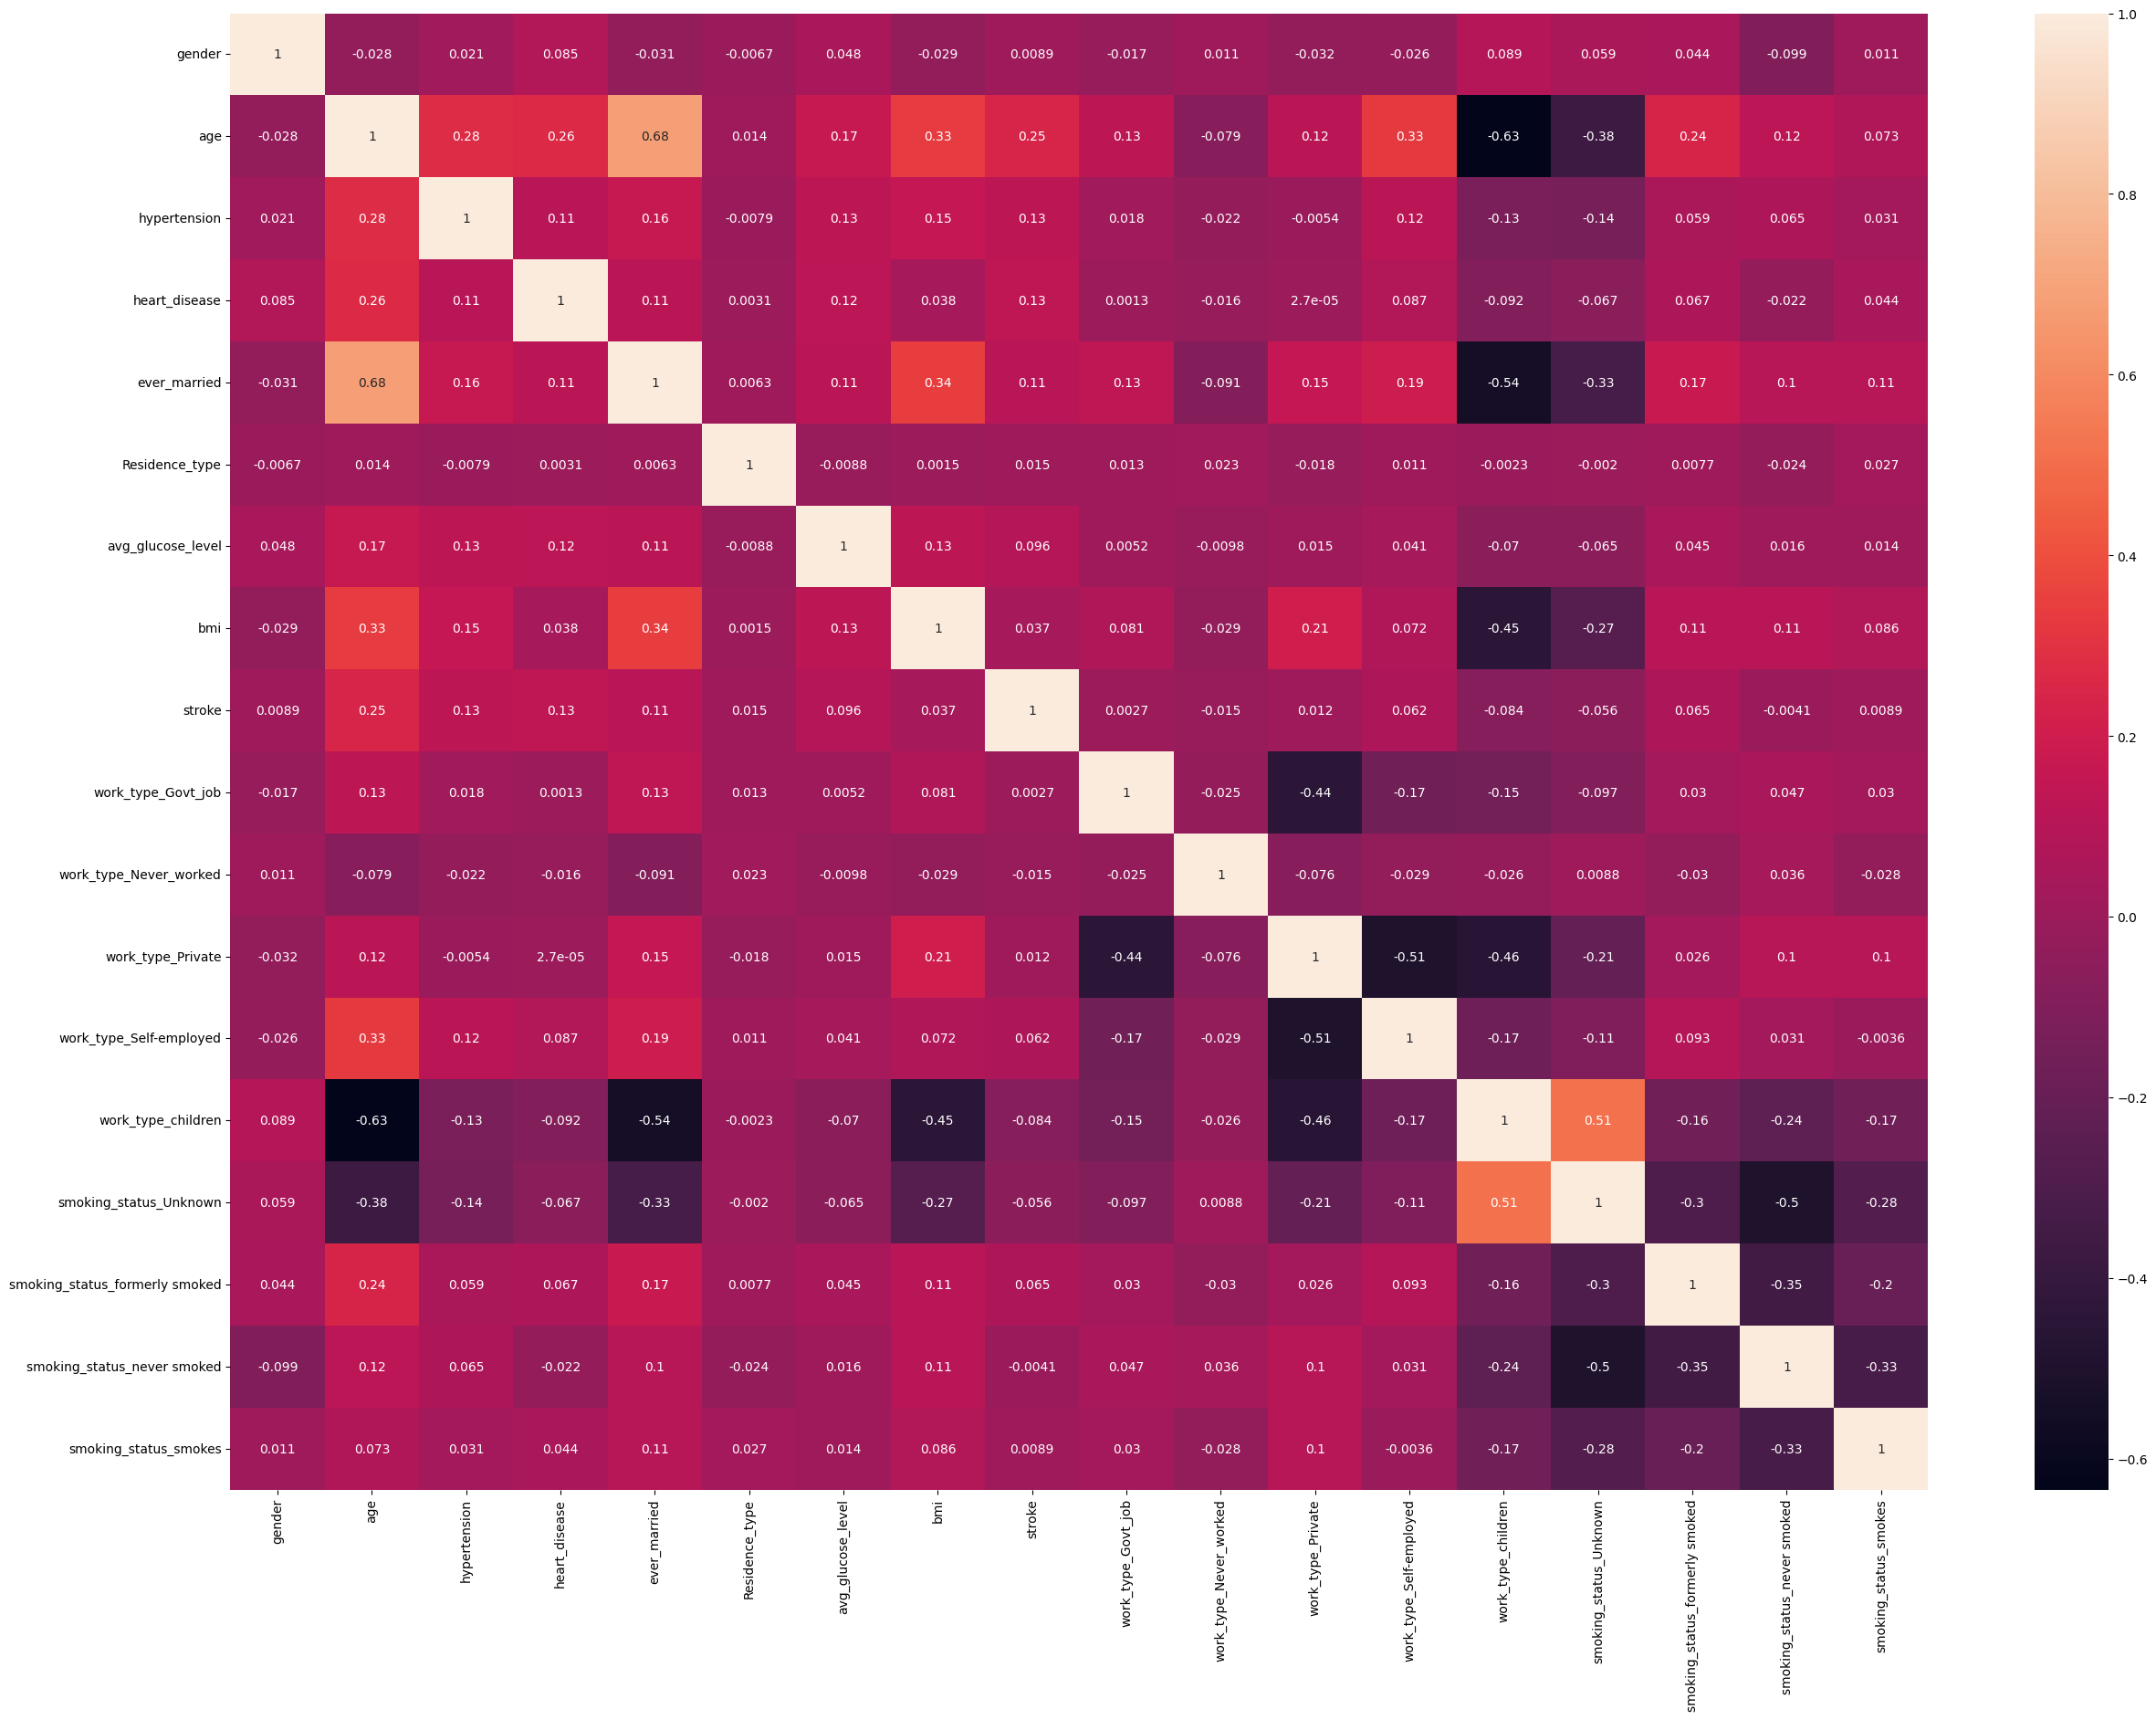

In [55]:
plt.figure(figsize=(30,21))
sns.heatmap(df.corr(), annot= True)

### Train Test Split 

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x = x_sampled
y = y_sampled

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7388, 17), (1847, 17), (7388,), (1847,))

### Logistic regression Model

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train,y_train)

LogisticRegression()

In [61]:
pred = logistic_clf.predict(x_test)[50:60]
pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [62]:
y_test[50:60]

6177    1
7017    1
3661    0
3463    0
1758    0
3658    0
6878    1
5277    1
4394    0
7812    1
Name: stroke, dtype: int64

### Evaluation Matrics

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score, roc_curve

#### test

In [64]:
y_pred_test = logistic_clf.predict(x_test)

cnf_mat_test = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix Test data :\n',cnf_mat_test)
print('-'*50)

accuracy_test = accuracy_score(y_test,y_pred_test)
print('Accuracy :\n',accuracy_test)
print('-'*50)

clf_report_test = classification_report(y_test,y_pred_test)
print('Classification Report :\n',clf_report_test)

Confusion Matrix Test data :
 [[902  56]
 [122 767]]
--------------------------------------------------
Accuracy :
 0.9036275040606389
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       958
           1       0.93      0.86      0.90       889

    accuracy                           0.90      1847
   macro avg       0.91      0.90      0.90      1847
weighted avg       0.91      0.90      0.90      1847



#### train

In [65]:
y_pred_train = logistic_clf.predict(x_train)

cnf_mat_train = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix Test data :\n',cnf_mat_train)
print('-'*50)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('Accuracy :\n',accuracy_train)
print('-'*50)

clf_report_train = classification_report(y_train,y_pred_train)
print('Classification Report :\n',clf_report_train)

Confusion Matrix Test data :
 [[3633  270]
 [ 463 3022]]
--------------------------------------------------
Accuracy :
 0.9007850568489443
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      3903
           1       0.92      0.87      0.89      3485

    accuracy                           0.90      7388
   macro avg       0.90      0.90      0.90      7388
weighted avg       0.90      0.90      0.90      7388



#### Logistic Regression model has 90% of testing accuracy and 90% of training accuracy`

In [66]:
x = x_sampled
y = y_sampled

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7388, 17), (1847, 17), (7388,), (1847,))

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

#### test

In [70]:
y_pred_test = dt_clf.predict(x_test)

cnf_mat_test = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix Test data :\n',cnf_mat_test)
print('-'*50)

accuracy_test = accuracy_score(y_test,y_pred_test)
print('Accuracy :\n',accuracy_test)
print('-'*50)

clf_report_test = classification_report(y_test,y_pred_test)
print('Classification Report :\n',clf_report_test)

Confusion Matrix Test data :
 [[904  54]
 [ 71 818]]
--------------------------------------------------
Accuracy :
 0.932322685435842
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       958
           1       0.94      0.92      0.93       889

    accuracy                           0.93      1847
   macro avg       0.93      0.93      0.93      1847
weighted avg       0.93      0.93      0.93      1847



#### train

In [71]:
y_pred_train = dt_clf.predict(x_train)

cnf_mat_train = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix Test data :\n',cnf_mat_train)
print('-'*50)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('Accuracy :\n',accuracy_train)
print('-'*50)

clf_report_train = classification_report(y_train,y_pred_train)
print('Classification Report :\n',clf_report_train)

Confusion Matrix Test data :
 [[3903    0]
 [   0 3485]]
--------------------------------------------------
Accuracy :
 1.0
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3903
           1       1.00      1.00      1.00      3485

    accuracy                           1.00      7388
   macro avg       1.00      1.00      1.00      7388
weighted avg       1.00      1.00      1.00      7388



In [72]:
dt_clf.feature_importances_

array([0.01736134, 0.46338956, 0.00620793, 0.0047336 , 0.00799352,
       0.01758273, 0.07655548, 0.10717687, 0.03873393, 0.        ,
       0.02421547, 0.03700123, 0.        , 0.04485247, 0.03489232,
       0.06246966, 0.05683388])

In [73]:
s1 = pd.Series(dt_clf.feature_importances_, index=x.columns)
s1

gender                            0.017361
age                               0.463390
hypertension                      0.006208
heart_disease                     0.004734
ever_married                      0.007994
Residence_type                    0.017583
avg_glucose_level                 0.076555
bmi                               0.107177
work_type_Govt_job                0.038734
work_type_Never_worked            0.000000
work_type_Private                 0.024215
work_type_Self-employed           0.037001
work_type_children                0.000000
smoking_status_Unknown            0.044852
smoking_status_formerly smoked    0.034892
smoking_status_never smoked       0.062470
smoking_status_smokes             0.056834
dtype: float64

<Axes: >

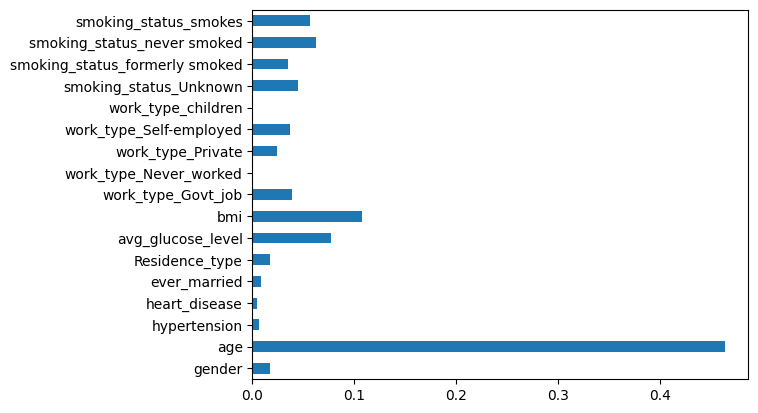

In [74]:
s1 = pd.Series(dt_clf.feature_importances_, index=x.columns)
s1.plot(kind = 'barh')

### Hyperparameter Tuning

In [75]:
x = x_sampled
y = y_sampled

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7388, 17), (1847, 17), (7388,), (1847,))

In [77]:
hyp_grid = {"criterion" : ['gini','entropy'],
            "max_depth" : np.arange(3,10),
            "min_samples_split" : np.arange(5,20),
            "min_samples_leaf" : np.arange(2,10)}

dt_clf = DecisionTreeClassifier(random_state=10)

dt_clf = GridSearchCV(dt_clf, hyp_grid, scoring=None,cv = 4, n_jobs=-1) # cv >> 3 to 10
dt_clf.fit(x_train, y_train)
dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=8,
                       min_samples_split=5, random_state=10)

_________________________________________________________________________________________________________

#### test

In [78]:
y_pred_test = dt_clf.predict(x_test)

cnf_mat_test = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix Test data :\n',cnf_mat_test)
print('-'*50)

accuracy_test = accuracy_score(y_test,y_pred_test)
print('Accuracy :\n',accuracy_test)
print('-'*50)

clf_report_test = classification_report(y_test,y_pred_test)
print('Classification Report :\n',clf_report_test)

Confusion Matrix Test data :
 [[863  95]
 [ 67 822]]
--------------------------------------------------
Accuracy :
 0.9122902003248511
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       958
           1       0.90      0.92      0.91       889

    accuracy                           0.91      1847
   macro avg       0.91      0.91      0.91      1847
weighted avg       0.91      0.91      0.91      1847



#### train

In [79]:
y_pred_train = dt_clf.predict(x_train)

cnf_mat_train = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix Test data :\n',cnf_mat_train)
print('-'*50)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('Accuracy :\n',accuracy_train)
print('-'*50)

clf_report_train = classification_report(y_train,y_pred_train)
print('Classification Report :\n',clf_report_train)

Confusion Matrix Test data :
 [[3585  318]
 [ 187 3298]]
--------------------------------------------------
Accuracy :
 0.9316459122902003
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      3903
           1       0.91      0.95      0.93      3485

    accuracy                           0.93      7388
   macro avg       0.93      0.93      0.93      7388
weighted avg       0.93      0.93      0.93      7388



#### By Using Hyperparameter Tuning The Model Testing accuracy is 91% and Training accuracy is 93%

### Pruning 

In [80]:
x = x_sampled
y = y_sampled

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7388, 17), (1847, 17), (7388,), (1847,))

In [82]:
dt_clf = DecisionTreeClassifier(random_state=10,ccp_alpha=None)

path = dt_clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, _ = path.ccp_alphas, path.impurities

In [83]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alphas:
    print("CCP Alpha :", ccp_alpha)
    
    dt_clf = DecisionTreeClassifier( ccp_alpha=ccp_alpha)
    dt_clf.fit(x_train, y_train)
    
    train_accuracy_list.append(dt_clf.score(x_train, y_train))
    test_accuracy_list.append(dt_clf.score(x_test, y_test))
    
    print("Training Accuracy ==",dt_clf.score(x_train, y_train))
    print("Testing  Accuracy ==",dt_clf.score(x_test, y_test))
    print("*"*30)
    

CCP Alpha : 0.0
Training Accuracy == 1.0
Testing  Accuracy == 0.9388197076340011
******************************
CCP Alpha : 8.329515638665607e-05
Training Accuracy == 0.9997292907417433
Testing  Accuracy == 0.9350297780184083
******************************
CCP Alpha : 8.813789803704318e-05
Training Accuracy == 0.9997292907417433
Testing  Accuracy == 0.9339469409853817
******************************
CCP Alpha : 8.831649560145462e-05
Training Accuracy == 0.999593936112615
Testing  Accuracy == 0.9366540335679481
******************************
CCP Alpha : 8.859575724762515e-05
Training Accuracy == 0.999593936112615
Testing  Accuracy == 0.9350297780184083
******************************
CCP Alpha : 8.865332434135331e-05
Training Accuracy == 0.9993232268543584
Testing  Accuracy == 0.9355711965349215
******************************
CCP Alpha : 9.96210070384407e-05
Training Accuracy == 0.9990525175961018
Testing  Accuracy == 0.9366540335679481
******************************
CCP Alpha : 0.0001127

Training Accuracy == 0.9901191120736329
Testing  Accuracy == 0.9409853817000542
******************************
CCP Alpha : 0.00019315471399932693
Training Accuracy == 0.9891716296697347
Testing  Accuracy == 0.9415268002165674
******************************
CCP Alpha : 0.00019336375589759457
Training Accuracy == 0.9891716296697347
Testing  Accuracy == 0.9415268002165674
******************************
CCP Alpha : 0.00019719858248290164
Training Accuracy == 0.9886302111532215
Testing  Accuracy == 0.9420682187330807
******************************
CCP Alpha : 0.00020092434566106442
Training Accuracy == 0.9882241472658365
Testing  Accuracy == 0.9420682187330807
******************************
CCP Alpha : 0.0002030319436924743
Training Accuracy == 0.9876827287493233
Testing  Accuracy == 0.9404439631835408
******************************
CCP Alpha : 0.0002030319436924743
Training Accuracy == 0.9882241472658365
Testing  Accuracy == 0.9404439631835408
******************************
CCP Alpha : 0.0

Training Accuracy == 0.9750947482403898
Testing  Accuracy == 0.9399025446670276
******************************
CCP Alpha : 0.000281232144251103
Training Accuracy == 0.97428262046562
Testing  Accuracy == 0.9404439631835408
******************************
CCP Alpha : 0.0002819888106839921
Training Accuracy == 0.9744179750947483
Testing  Accuracy == 0.9409853817000542
******************************
CCP Alpha : 0.000284244721169464
Training Accuracy == 0.9740119112073633
Testing  Accuracy == 0.9404439631835408
******************************
CCP Alpha : 0.0002898621806838161
Training Accuracy == 0.9733351380617217
Testing  Accuracy == 0.9415268002165674
******************************
CCP Alpha : 0.00029004563384639183
Training Accuracy == 0.9734704926908501
Testing  Accuracy == 0.9420682187330807
******************************
CCP Alpha : 0.0003001341776323531
Training Accuracy == 0.9734704926908501
Testing  Accuracy == 0.9420682187330807
******************************
CCP Alpha : 0.00030254

Testing  Accuracy == 0.9214943151055766
******************************
CCP Alpha : 0.0008037026396915019
Training Accuracy == 0.9367893881970764
Testing  Accuracy == 0.9214943151055766
******************************
CCP Alpha : 0.0008168756748961227
Training Accuracy == 0.9353004872766648
Testing  Accuracy == 0.9214943151055766
******************************
CCP Alpha : 0.0008264262133490224
Training Accuracy == 0.9346237141310233
Testing  Accuracy == 0.9209528965890633
******************************
CCP Alpha : 0.000846322628444419
Training Accuracy == 0.9331348132106118
Testing  Accuracy == 0.9187872225230103
******************************
CCP Alpha : 0.0008808666942683951
Training Accuracy == 0.9317812669193286
Testing  Accuracy == 0.9187872225230103
******************************
CCP Alpha : 0.0008978666562686056
Training Accuracy == 0.9306984298863021
Testing  Accuracy == 0.918245804006497
******************************
CCP Alpha : 0.0009211634482343741
Training Accuracy == 0.9288

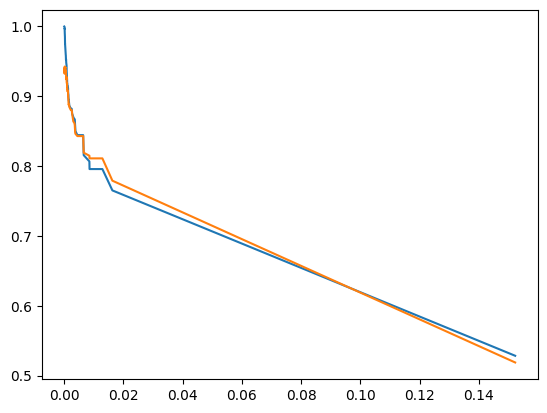

In [84]:
plt.plot(ccp_alphas,train_accuracy_list )
plt.plot(ccp_alphas,test_accuracy_list )

In [85]:
px.scatter(x = ccp_alphas,y = [test_accuracy_list,train_accuracy_list])

In [86]:
dt_clf = DecisionTreeClassifier( ccp_alpha=0.000369461149572594)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.000369461149572594)

#### test

In [87]:
y_pred_test = dt_clf.predict(x_test)

cnf_mat_test = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix Test data :\n',cnf_mat_test)
print('-'*50)

accuracy_test = accuracy_score(y_test,y_pred_test)
print('Accuracy :\n',accuracy_test)
print('-'*50)

clf_report_test = classification_report(y_test,y_pred_test)
print('Classification Report :\n',clf_report_test)

Confusion Matrix Test data :
 [[913  45]
 [ 72 817]]
--------------------------------------------------
Accuracy :
 0.9366540335679481
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       958
           1       0.95      0.92      0.93       889

    accuracy                           0.94      1847
   macro avg       0.94      0.94      0.94      1847
weighted avg       0.94      0.94      0.94      1847



#### train

In [88]:
y_pred_train = dt_clf.predict(x_train)

cnf_mat_train = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix Test data :\n',cnf_mat_train)
print('-'*50)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('Accuracy :\n',accuracy_train)
print('-'*50)

clf_report_train = classification_report(y_train,y_pred_train)
print('Classification Report :\n',clf_report_train)

Confusion Matrix Test data :
 [[3804   99]
 [ 135 3350]]
--------------------------------------------------
Accuracy :
 0.968327016783974
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3903
           1       0.97      0.96      0.97      3485

    accuracy                           0.97      7388
   macro avg       0.97      0.97      0.97      7388
weighted avg       0.97      0.97      0.97      7388



#### By Using Pruning The Model Testing accuracy is 93% and Training accuracy is 96%